## Load Log Files

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [4]:
directory = "./Logs/"
save_path = "./Saved/"

### Reload Log Files

In [5]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [6]:
import pandas as pd
import numpy as np
import re
import os
import pickle
import sys
import random

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [7]:
n_clusters = 10

## Evaluate the Count Vectorizer Parameter

In [8]:
min_df_vals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_val = 10

In [9]:
def features_param_metrics(logs, gram):
    vms = []
    fms = []
    for i in range(n_val):
        vmn = []
        fmn = []
        
        random_val = random.randint(1, 45)
        for min_df_val in min_df_vals:
            labels_ = log_labels
            
            X = get_features(logs, gram, min_df_val)
            X = X.toarray()
    
            idxs = np.where(np.all(X == 0, axis=1))

            X = np.delete(X, idxs, axis=0)
            labels_ = np.delete(labels_, idxs)

            kmeans = KMeans(init="k-means++", n_clusters=n_clusters, random_state=random_val).fit(X)
            labels = kmeans.labels_

            vm = evaluate_vmeasure(labels_, labels)
            vmn.append(vm)
            
            fm = evaluate_fm(labels_, labels)
            fmn.append(fm)
        
        vmn.append(random_val)
        fmn.append(random_val)
        
        vms.append(vmn)
        fms.append(fmn)
        
    return vms, fms
    
        

In [10]:
def find_best_param(vms, fms):
    vsums = np.sum(vms, axis=0)
    fsums = np.sum(fms, axis=0)
    
    print(np.argmin(np.std(vms, axis=0)))
    print(np.argmin(np.std(fms, axis=0)))
    
    return np.argmax(vsums/n_val), np.argmax(fsums/n_val)

In [11]:
def plot_features_performance(metrics, title):
    sns.set(style='white', context='poster', rc={'figure.figsize':(14,8)})
    plt.figure(0).clf()
    plt.title(title)
    i=0
    for mm in metrics:
        plt.plot(min_df_vals, mm, label=str(i))
        i+=1

        plt.legend(loc=0)


In [12]:
vms, fms = features_param_metrics(logs, 2)

In [13]:
header = min_df_vals[:] 
header.extend(["Seed"])

tab_results(header, vms)

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|          10         |          20         |          30         |          40         |          50         |          60         |          70         |          80         |          90         |         100         | Seed |
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|  0.2964759034139537 | 0.23782878003542932 | 0.30193431296212575 |  0.3267375266875018 | 0.23830040486734835 |  0.2747664642593859 |  0.2392936662172262 |  0.2627506450146022 | 0.21008193786914797 | 0.24094208630189667 |  36  |
| 0.25078732839623313 | 0.29811961741612064 |  0.2777564244185548 | 0.19755988871463

In [14]:
tab_results(header, fms)

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|          10         |          20         |          30         |          40         |          50         |          60         |          70         |          80         |          90         |         100         | Seed |
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|   0.36308548628957  |  0.3484114019951291 |  0.379111636540943  |  0.4194350838101864 |  0.3499735905258337 |  0.3609887988924492 | 0.35164879339569505 |  0.3631881411542769 | 0.33936442259335226 |  0.3516227559166437 |  36  |
| 0.34150402103841154 | 0.36679496424047786 | 0.34840419728597094 |  0.3183440966012

In [15]:
vms=np.delete(vms, -1, axis=1)
fms=np.delete(fms, -1, axis=1)
indvm, indfm = find_best_param(vms, fms)

4
4


In [16]:
indvm, indfm

(9, 9)

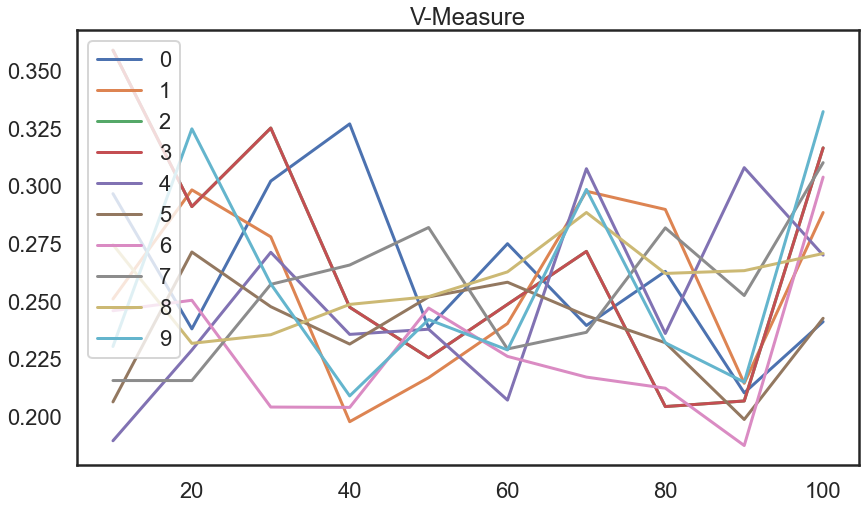

In [17]:
plot_features_performance(vms, "V-Measure")

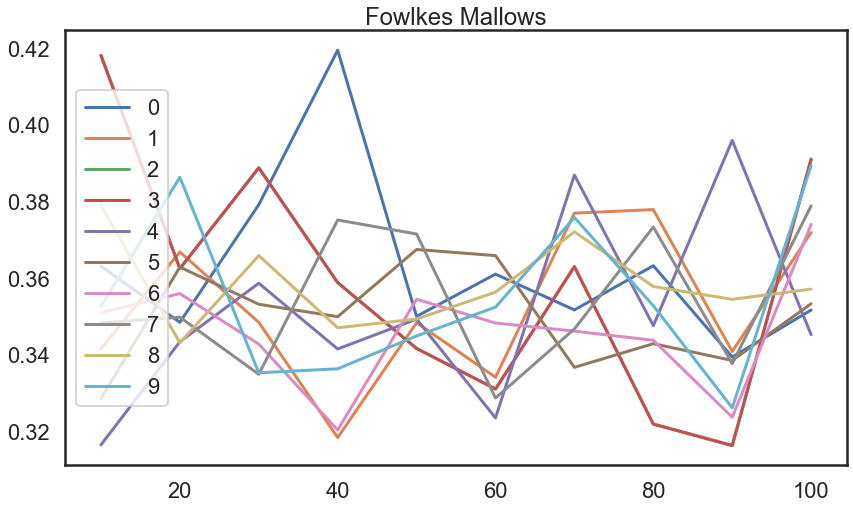

In [18]:
plot_features_performance(fms, "Fowlkes Mallows")

In [19]:
vms, fms = features_param_metrics(logs, 3)

In [20]:
header = min_df_vals[:]
header.extend(["Seed"])

tab_results(header, vms)

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|          10         |          20         |          30         |          40         |          50         |          60         |          70         |          80         |          90         |         100         | Seed |
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
| 0.28767872666863514 | 0.22525452677341598 | 0.32282271040185456 | 0.16704152376949727 |  0.3206721932918286 |  0.3922785676003587 | 0.32404482550583763 |  0.2839011834531231 | 0.21193667653119655 | 0.28367179251721086 |  22  |
|  0.1753366359623163 | 0.27397251498755154 |  0.3566766492114599 | 0.24717634481722

In [21]:
tab_results(header, fms)

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|          10         |          20         |          30         |          40         |          50         |          60         |          70         |          80         |          90         |         100         | Seed |
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|  0.3682549645166933 |  0.3341399499864651 | 0.38629923727596205 |  0.3142656615290101 |  0.3923821663352744 | 0.43722754070109404 | 0.40299960649847083 |  0.3552656301844794 | 0.33165010014746765 | 0.34528632868953113 |  22  |
|  0.3201500080623877 | 0.36539994590167235 |  0.4449135320410504 |  0.3549244579523

In [22]:
vms=np.delete(vms, -1, axis=1)
fms=np.delete(fms, -1, axis=1)
indvm, indfm = find_best_param(vms, fms)

7
7


In [23]:
indvm, indfm

(9, 5)

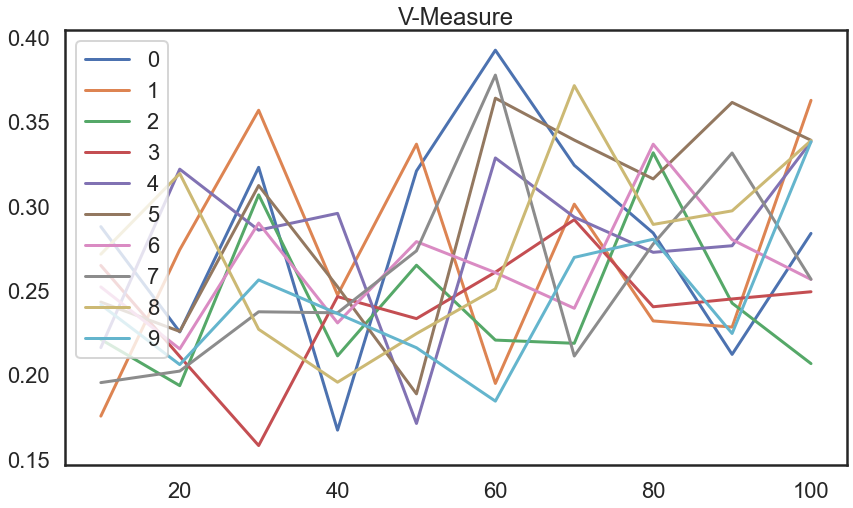

In [24]:
plot_features_performance(vms, "V-Measure")

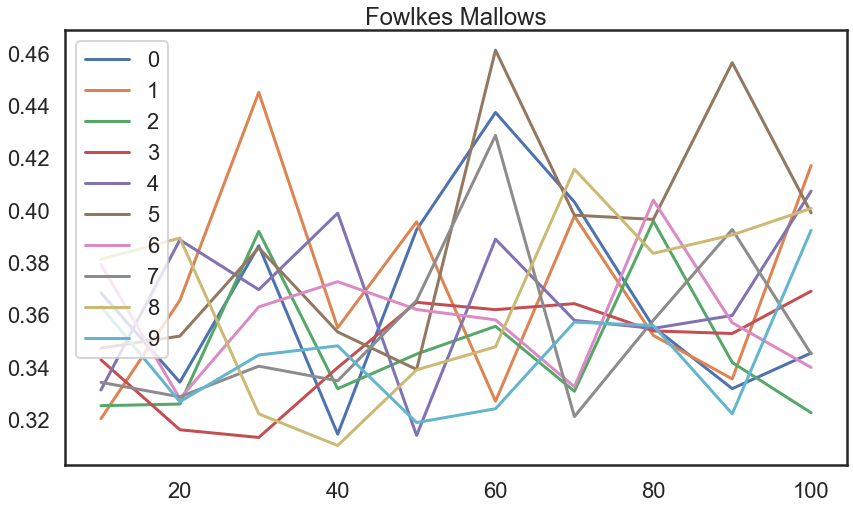

In [25]:
plot_features_performance(fms, "Fowlkes Mallows")

## Bigram Feature Vectorizer

In [26]:
eval_results = []

In [27]:
labels_ = log_labels
            
X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [28]:
X.shape

(10689, 358)

In [29]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,random_state=0).fit(X)
labels = kmeans.labels_

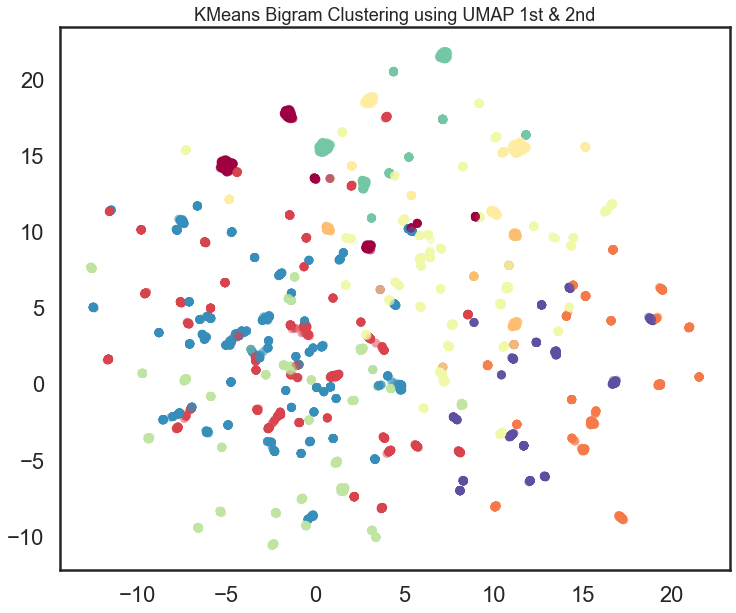

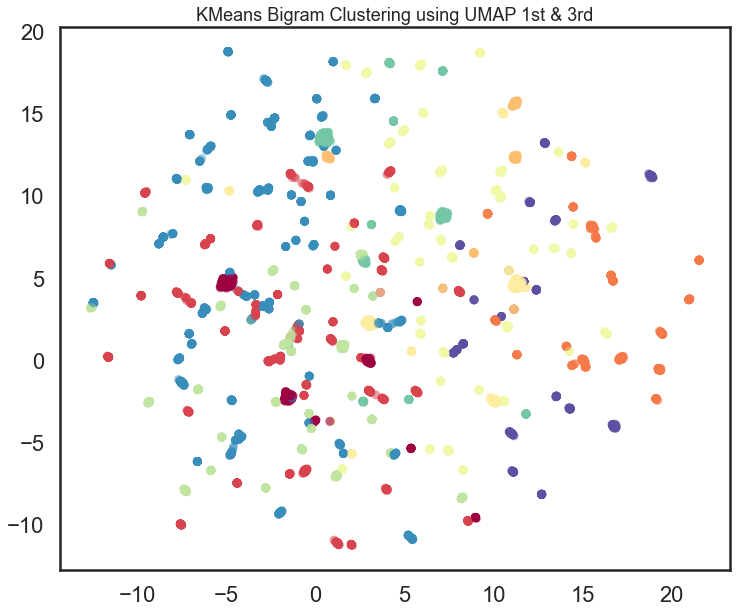

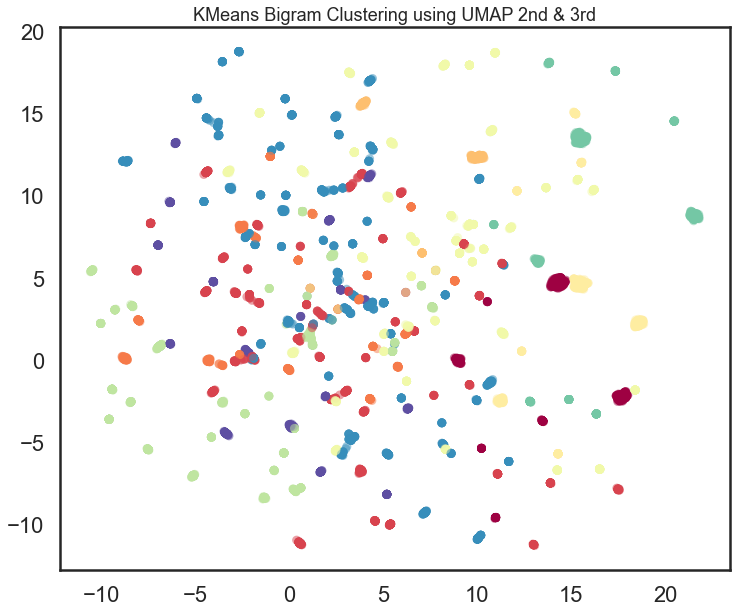

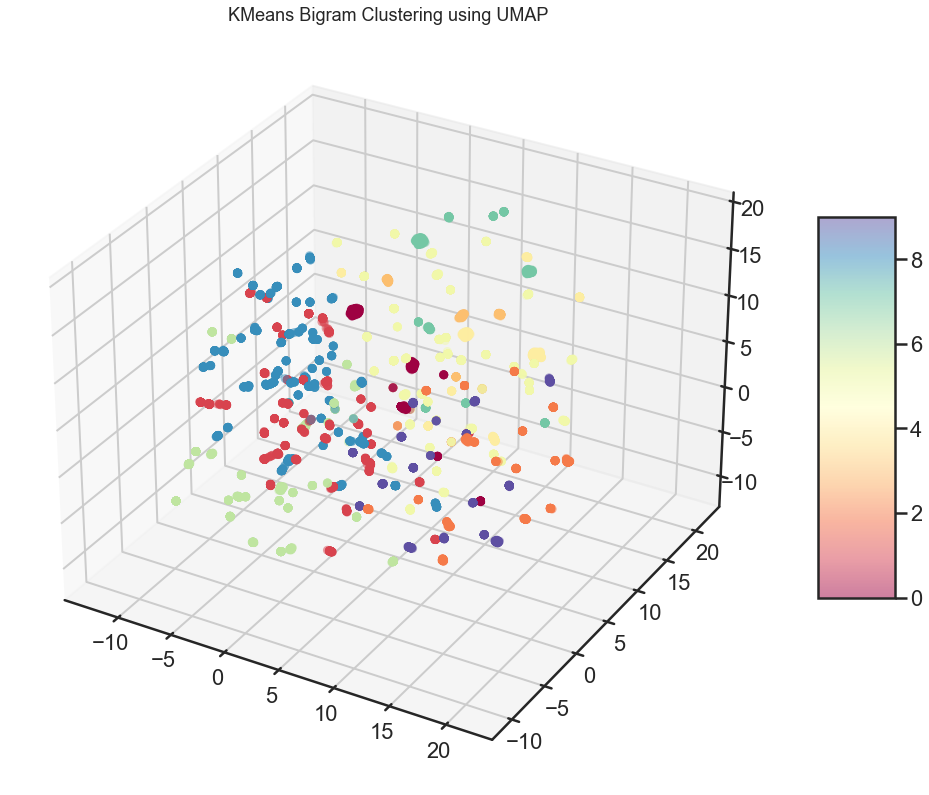

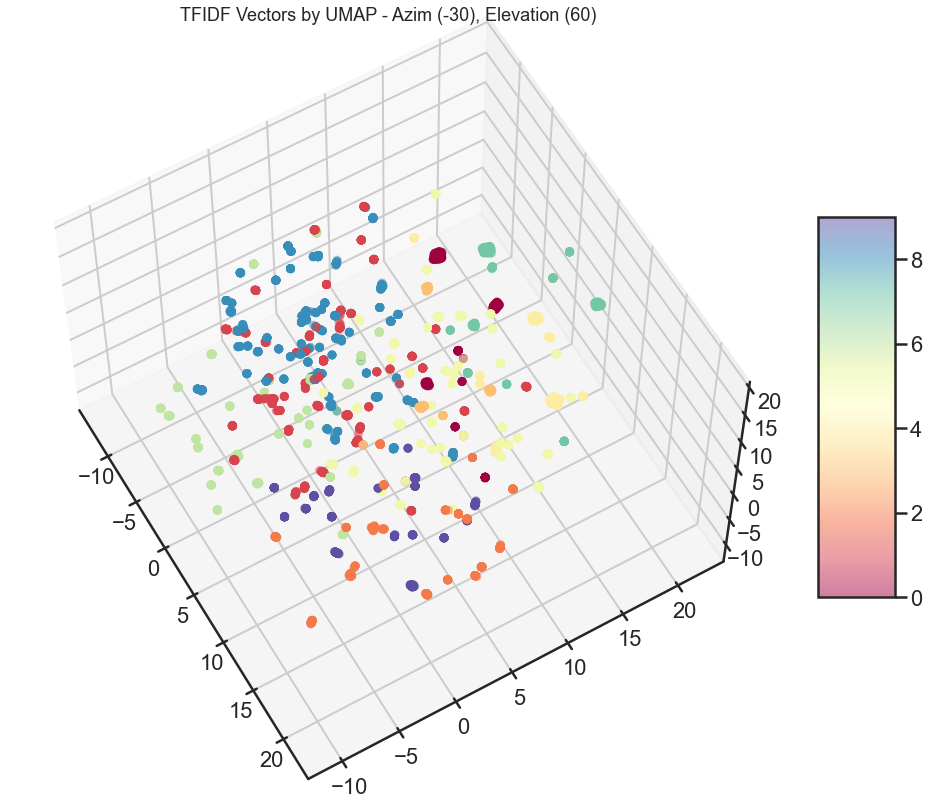

In [30]:
plot_clusters("KMeans Bigram Clustering using UMAP", X, labels)

In [31]:
results = evaluate_clustering('KMeans Bigram Clustering', X, labels_, labels)
print(results)

['KMeans Bigram Clustering', '0.78', '0.21', '0.33', '0.12', '0.33', '0.39']


In [32]:
eval_results.append(results)

## Trigram Feature Vectorizer

In [40]:
labels_ = log_labels
            
X = get_features(logs, 3, 90)
X = X.toarray()
idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [41]:
X.shape

(10640, 340)

In [42]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,random_state=0).fit(X)
labels = kmeans.labels_

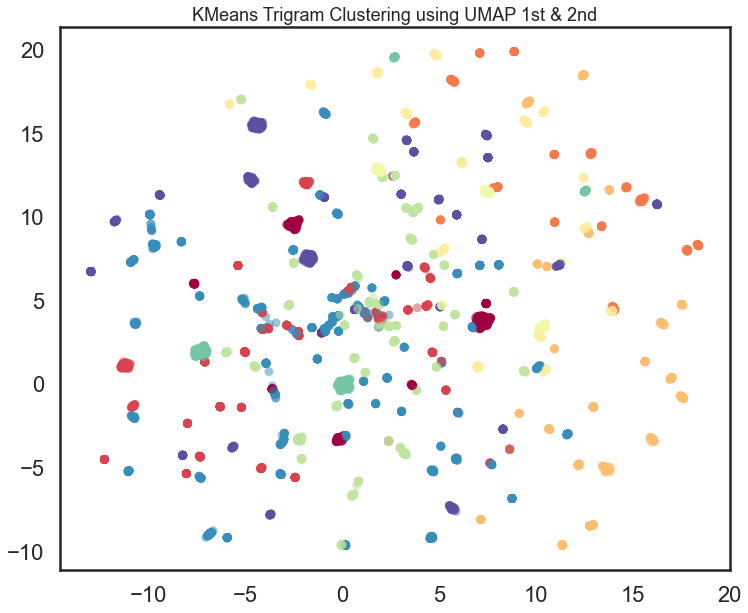

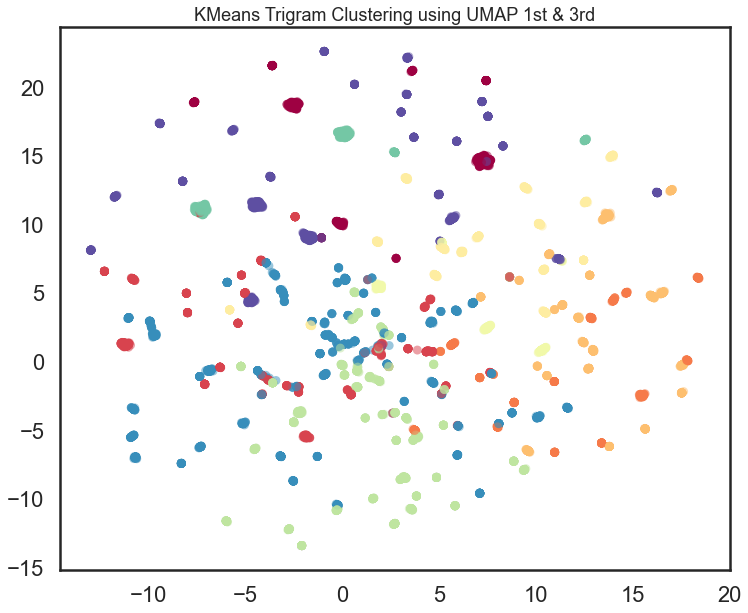

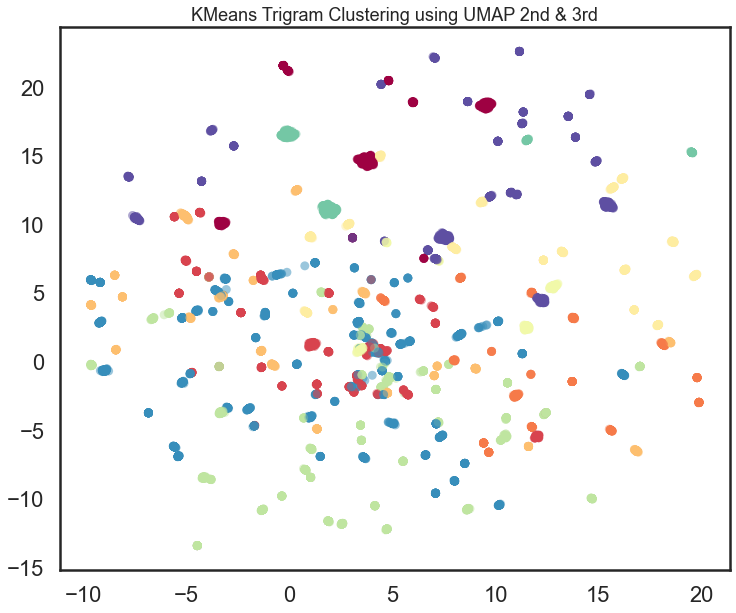

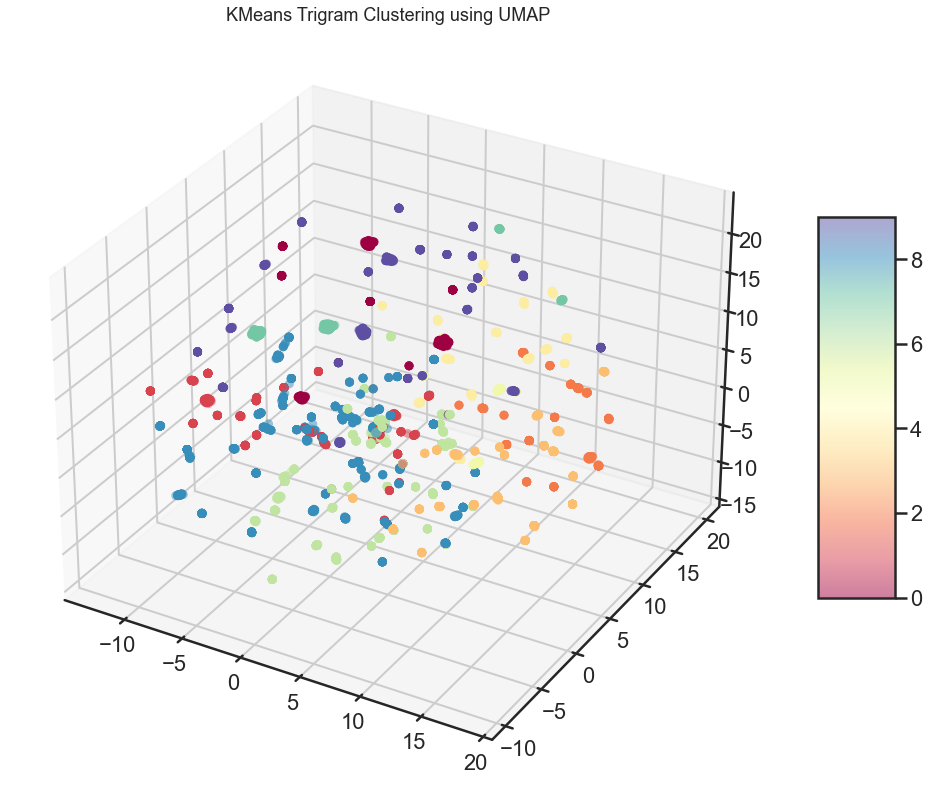

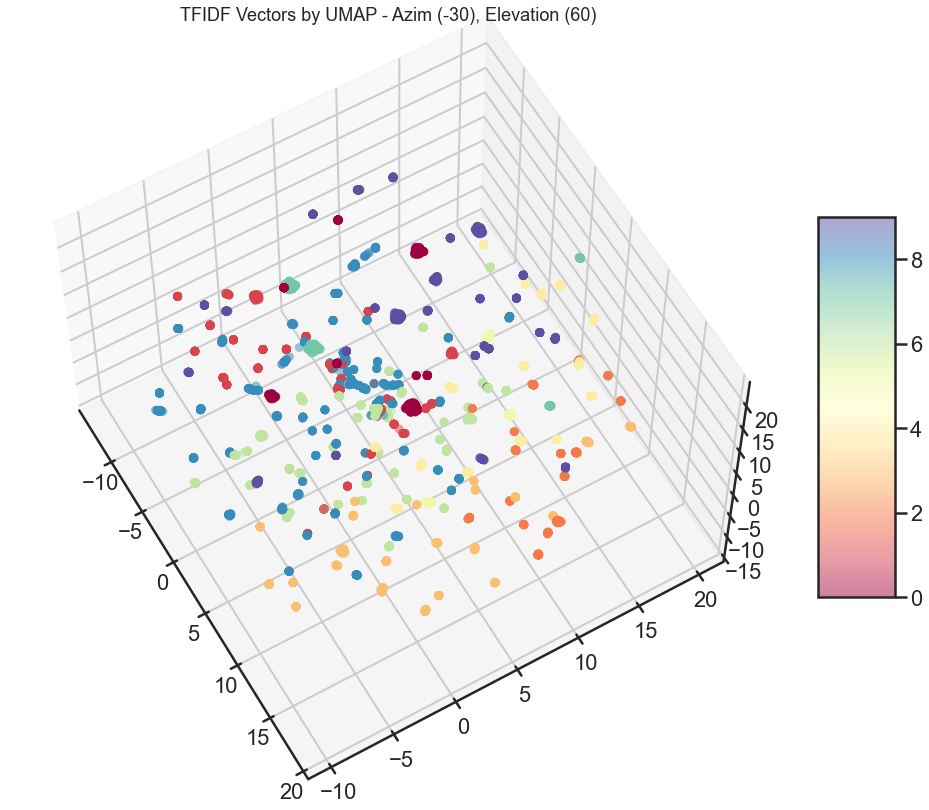

In [43]:
plot_clusters("KMeans Trigram Clustering using UMAP", X, labels)

In [44]:
results = evaluate_clustering('KMeans Trigram Clustering', X, labels_, labels)
print(results)

['KMeans Trigram Clustering', '0.59', '0.15', '0.24', '0.07', '0.24', '0.34']


In [45]:
eval_results.append(results)

In [46]:
tabulate_results(eval_results)

+---------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|            Name           | Homogeneity | Completeness | V Measure | Adj Rand Score | Norm Mutual Score | Fowlkes Mallows |
+---------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|  KMeans Bigram Clustering |     0.78    |     0.21     |    0.33   |      0.12      |        0.33       |       0.39      |
| KMeans Trigram Clustering |     0.59    |     0.15     |    0.24   |      0.07      |        0.24       |       0.34      |
| KMeans Trigram Clustering |     0.59    |     0.15     |    0.24   |      0.07      |        0.24       |       0.34      |
+---------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
